# Problem Statement:
**E-commerce platforms see vast amounts of transactions daily, but understanding customer purchase behaviors at a granular level can be challenging. This analysis aims to uncover insights into purchase patterns by answering key questions about customer preferences, spending behavior, and seasonal trends. These insights could help an e-commerce business optimize its inventory, enhance customer targeting, and plan promotions effectively.**

# Key Questions to Solve:

## Customer Demographics Analysis:

*What is the distribution of customers by age and gender?*

*Which age group has the highest average spending score*

*Is there a significant difference in purchasing behavior between male and female customers?*

## Spending Patterns:

*What is the average spending score for customers across different income brackets?*

*What are the top five product categories by revenue?*

*Is there a correlation between age and spending score?*

## Seasonal Trends:

*Which months see the highest volume of purchases?*

*Are there certain times of the year when customers spend more on specific product categories?*

*How does spending differ between weekdays and weekends?*

## Payment Method Insights:

*What are the most popular payment methods among customers?*

*Do customers with higher spending scores prefer certain payment methods?*

*Are there any noticeable trends in payment method preferences by age group?*

## Customer Loyalty:

*How many repeat customers are there in the dataset?*

*What is the average number of purchases per customer?*

*Is there a particular product category that repeat customers buy more frequently?*

## NOTE :

***THIS DATASET IS SYNTHETIC WHICH IS USED IN THIS PROJECT .....***

In [1]:
import pandas as pd 
import plotly.express as px
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('Ecommerce_Purchases_Dataset.csv')
df.head()

Customer ID  Gender  Age  Annual Income (k$)  \
0  dc47e642-6c20-410f-a86e-352db5a965bd    Male   47               93.29   
1  3aa2ad93-0fdd-496e-80f8-ff906e0074d0    Male   64               27.10   
2  cf2a6768-7068-4bc5-a99b-7398aa9993d2  Female   51               38.19   
3  80b460e9-ac23-4b55-9d85-8b5048710063  Female   27               41.44   
4  358932bc-cd76-49dd-b004-572535c6b324  Female   19               36.64   

   Spending Score Purchase Date Product Category  Product Price ($)  \
0              79    2023-10-31         Clothing             428.38   
1              57    2024-09-09           Sports             378.60   
2              93    2023-05-04         Clothing             201.90   
3              71    2022-05-21        Groceries             111.84   
4              87    2020-07-03      Electronics             128.42   

  Payment Method  
0         Paypal  
1         Paypal  
2     Debit Card  
3         Paypal  
4  Bank Transfer

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         5000 non-null   object 
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Annual Income (k$)  5000 non-null   float64
 4   Spending Score      5000 non-null   int64  
 5   Purchase Date       5000 non-null   object 
 6   Product Category    5000 non-null   object 
 7   Product Price ($)   5000 non-null   float64
 8   Payment Method      5000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 351.7+ KB


## DATA PREPROCESSING

In [4]:
df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
Purchase Date         0
Product Category      0
Product Price ($)     0
Payment Method        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# lets convert the 'Purchase Date' column dtype from object to datetime ............
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         5000 non-null   object        
 1   Gender              5000 non-null   object        
 2   Age                 5000 non-null   int64         
 3   Annual Income (k$)  5000 non-null   float64       
 4   Spending Score      5000 non-null   int64         
 5   Purchase Date       5000 non-null   datetime64[ns]
 6   Product Category    5000 non-null   object        
 7   Product Price ($)   5000 non-null   float64       
 8   Payment Method      5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 351.7+ KB


In [8]:
df.shape

(5000, 9)

In [9]:
stats = df.describe().transpose()
# this is coefficient varience which help us to identify whether std is low or high..........
stats['cv'] = stats['std'] / stats['mean'] * 100
stats

count                           mean  \
Age                 5000.0                         44.133   
Annual Income (k$)  5000.0                      85.638442   
Spending Score      5000.0                        50.5322   
Purchase Date         5000  2022-05-25 05:57:24.480000256   
Product Price ($)   5000.0                     253.409144   

                                    min                  25%  \
Age                                18.0                 31.0   
Annual Income (k$)                20.06                52.74   
Spending Score                      1.0                 26.0   
Purchase Date       2020-01-01 00:00:00  2021-03-01 18:00:00   
Product Price ($)                  5.11             129.9425   

                                    50%                  75%  \
Age                                44.0                 57.0   
Annual Income (k$)                85.72             118.1425   
Spending Score                     51.0                 74.0   
Purchase Date       2022-05-29 00:00:00  2023-08-12 00:00:00   
Product Price ($)                255.76                375.0   

                                    max         std         cv  
Age                                70.0   15.082653  34.175453  
Annual Income (k$)               149.99   37.583237  43.885942  
Spending Score                    100.0   28.586458  56.570777  
Purchase Date       2024-10-26 00:00:00         NaN        NaN  
Product Price ($)                499.87  142.361206  56.178401

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score'}>,
        <Axes: title={'center': 'Purchase Date'}>],
       [<Axes: title={'center': 'Product Price ($)'}>, <Axes: >]],
      dtype=object)

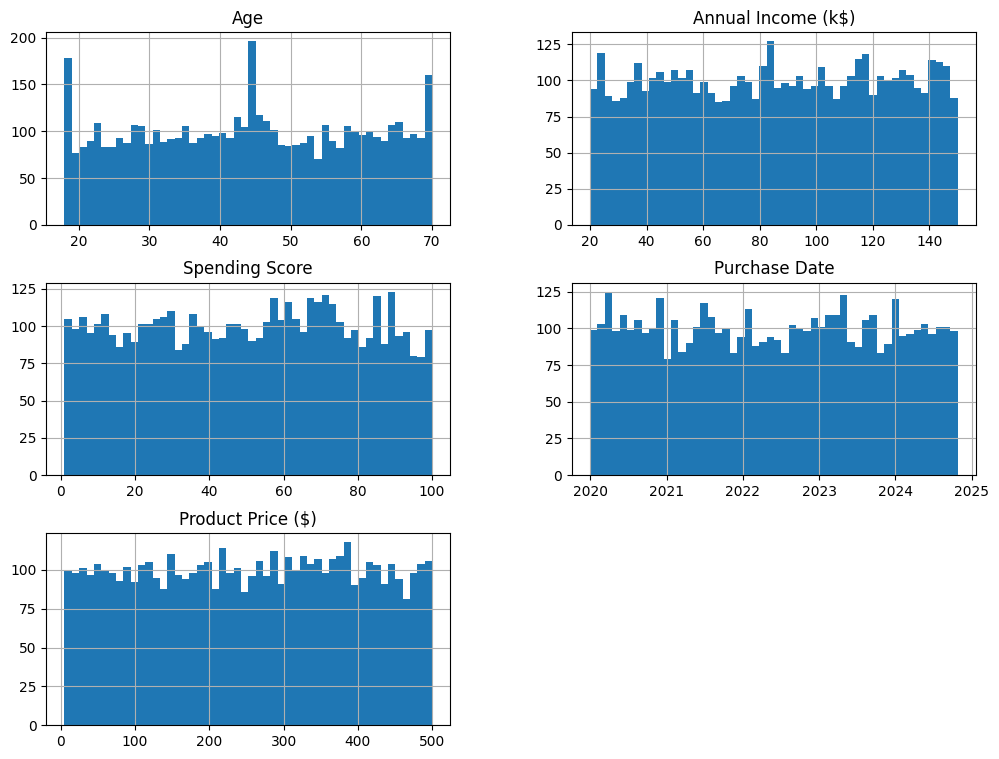

In [10]:
df.hist(bins= 50 ,  figsize=(12, 9) )

<Axes: >

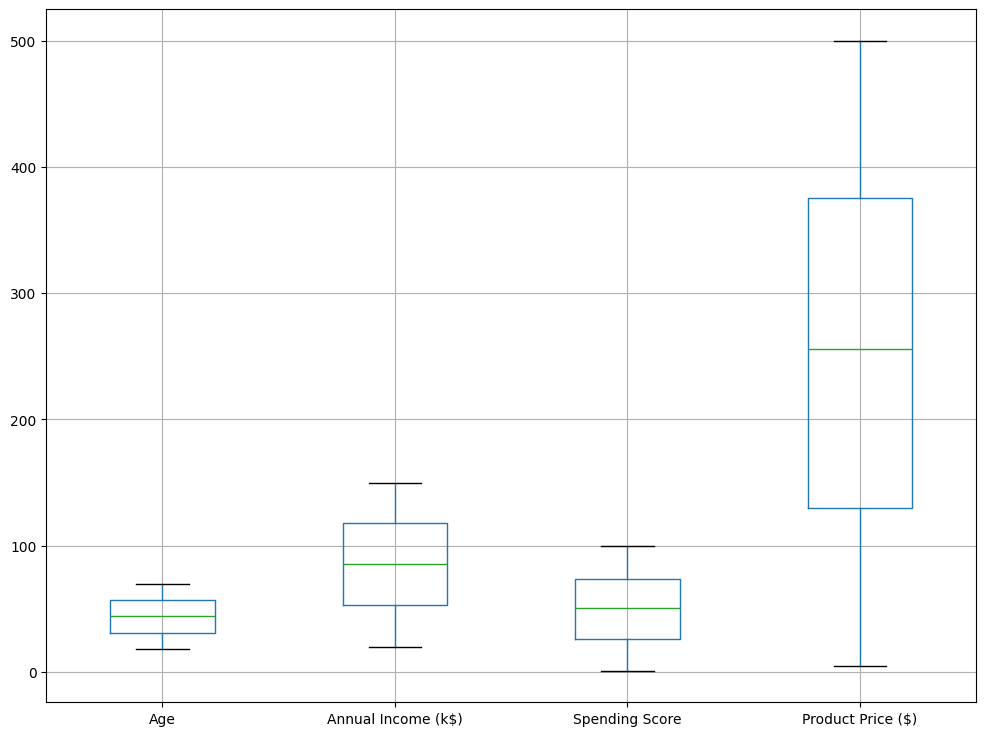

In [11]:
df.boxplot(figsize = (12,9))

**NO OUTLIERS FOUND ........................**

## EDA ( EXPOLARATRY DATA ANALYSIS )

In [12]:
# here we are makng the EDA report .........

report = ProfileReport(df , dark_mode = True , title = ' EDA REPORT FOR E-COMMERCE DATA ' )
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Customer Demographics Analysis:

*What is the distribution of customers by age and gender?*

*Which age group has the highest average spending score?*

*Is there a significant difference in purchasing behavior between male and female customers?*

In [13]:
def age_bracket(age):
    if 18 < age <=30:
        return '20s'
    elif 30 < age <=40:
        return '30s'
    elif 40<age<=50:
        return '40s'
    elif 50<age<=60:
        return '50s' 
    else:
        return '60s'

df['age_bracket'] = df['Age'].apply(age_bracket)


In [89]:
count = df.groupby("Gender")['age_bracket'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
count

Gender age_bracket  count
5    Male         20s    567
6    Male         60s    538
0  Female         40s    527
1  Female         20s    526
2  Female         60s    494
3  Female         50s    489
7    Male         30s    487
8    Male         40s    479
4  Female         30s    464
9    Male         50s    429

--------------------------------------------------------------------

### --- What is the distribution of customers by age and gender?

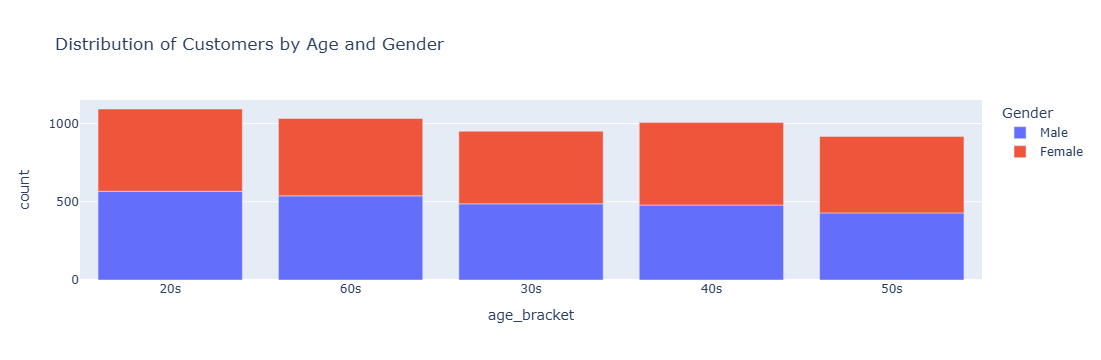

In [90]:
fig = px.bar(count , y = 'count', x = 'age_bracket' , color = 'Gender' , title = 'Distribution of Customers by Age and Gender')
fig.show()

***insights :***

***AS WE CAN SEE WE HAVE MOSTLY '20S' AGE GROUP PEOPLE .......***

-----------------------------------

### --- Which age group has the highest average spending score?

In [16]:
avg_spending_by_age = df.groupby('age_bracket')['Spending Score'].mean().reset_index().sort_values(by = 'Spending Score' , ascending = False)
avg_spending_by_age

age_bracket  Spending Score
4         60s       51.472868
0         20s       50.753888
2         40s       50.460239
1         30s       50.321767
3         50s       49.507625

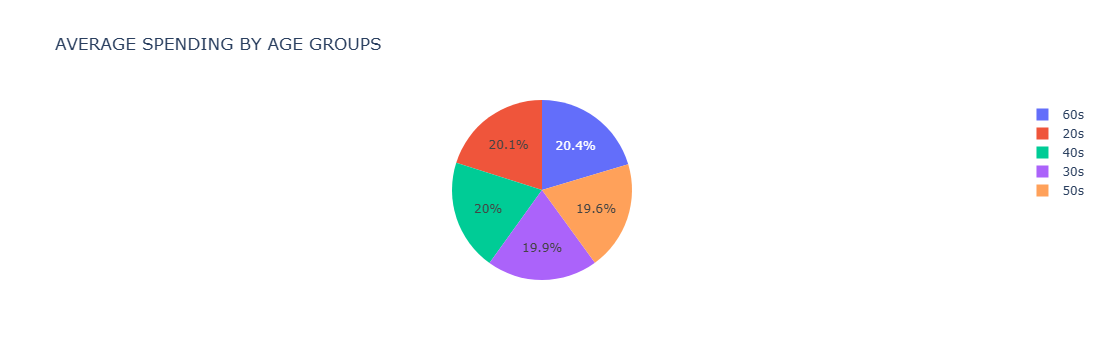

In [17]:
fig = px.pie(avg_spending_by_age , names = 'age_bracket' , values = 'Spending Score' , title = 'AVERAGE SPENDING BY AGE GROUPS')
fig.show()

***Insights :***

**SO MOST SPENDY PEOPLE ARE '60S' , '20S' , '40S' AND SO ON ............**

-----------------------------------------

### --- Is there a significant difference in purchasing behavior between male and female customers?

In [18]:
avg_purchasing_by_gender = df.groupby('Gender')['Product Price ($)'].sum().reset_index().sort_values(by = 'Product Price ($)' , ascending = False)
avg_purchasing_by_gender

Gender  Product Price ($)
0  Female          635431.79
1    Male          631613.93

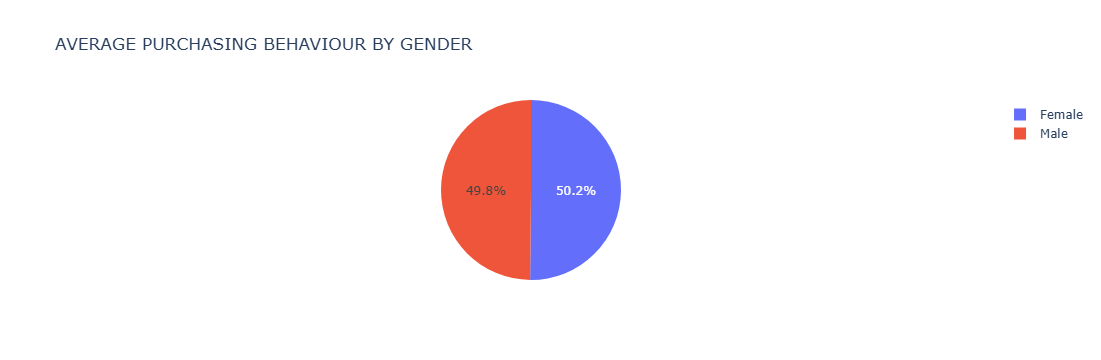

In [19]:
fig = px.pie(avg_purchasing_by_gender , names = 'Gender' , values = 'Product Price ($)' , color = 'Gender' , title = 'AVERAGE PURCHASING BEHAVIOUR BY GENDER')
fig.show()

***Insights :***

**ALMOST SAME PATTREN BETWEEN BOTH GENDERS .......**

------------------------------------------------

## Spending Patterns:

*What is the average spending score for customers across different income brackets?*

*What are the top five product categories by revenue?*

*Is there a correlation between age and spending score?*

In [20]:
def income_bracket(income):
    if 20 < income <=50:
        return 'Lower class'
    elif 50 < income <=100:
        return 'Middle class' 
    else:
        return 'High class'

df['income_bracket'] = df['Annual Income (k$)'].apply(income_bracket)

### --- What is the average spending score for customers across different income brackets?

In [21]:
avg_spending_by_income_barckets = df.groupby('income_bracket')['Spending Score'].mean().reset_index().sort_values(by = 'Spending Score', ascending = False)
avg_spending_by_income_barckets


income_bracket  Spending Score
2   Middle class       51.761704
0     High class       50.598574
1    Lower class       48.360035

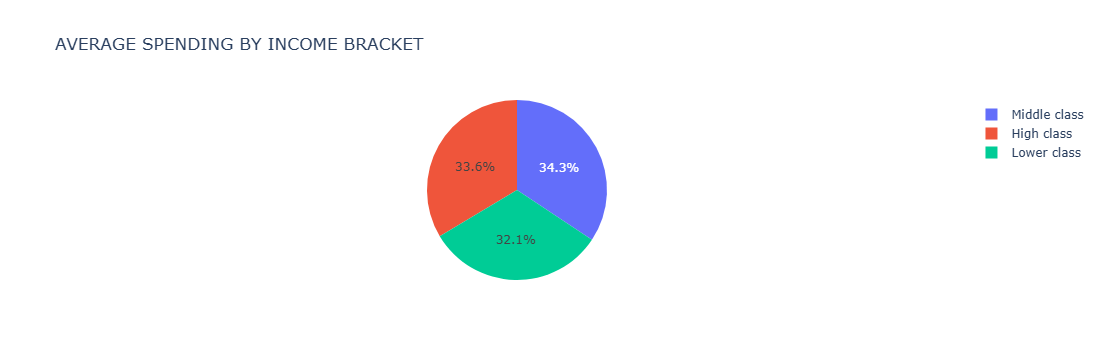

In [22]:
fig = px.pie(avg_spending_by_income_barckets , names = 'income_bracket' , values = 'Spending Score' , title = 'AVERAGE SPENDING BY INCOME BRACKET')
fig.show()

***Insights :***
**MOSTLY MIDDLE CLASS SPENDS THAN HIGH CLASS AND THAN LOWER CLASS**

-----------------------------------

### --- What are the top five product categories by revenue?

In [23]:
prod_cat_by_rev  =df.groupby('Product Category')['Product Price ($)'].sum().reset_index().sort_values(by = 'Product Price ($)' , ascending = False)
prod_cat_by_rev

Product Category  Product Price ($)
0           Beauty          192441.50
5   Home & Kitchen          190170.34
2         Clothing          183989.68
3      Electronics          177028.46
6           Sports          176439.09
1            Books          175631.18
4        Groceries          171345.47

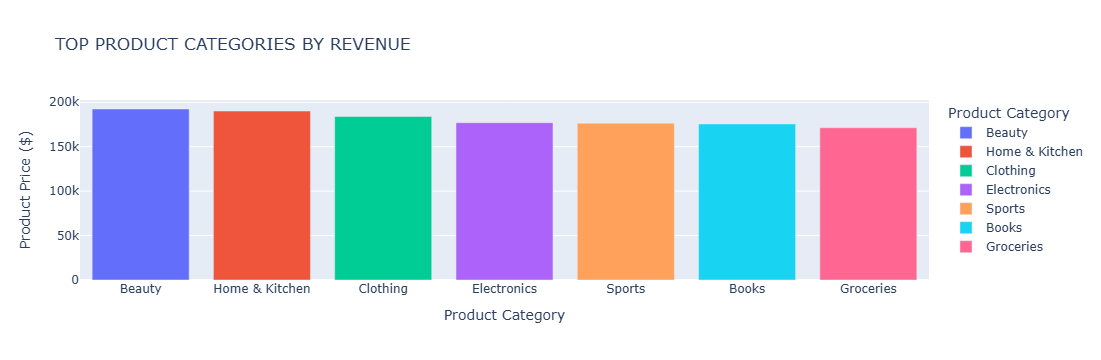

In [24]:
fig = px.bar(prod_cat_by_rev , x = 'Product Category' , y = 'Product Price ($)' , color = 'Product Category' , title = 'TOP PRODUCT CATEGORIES BY REVENUE' )
fig.show()

------------------

### --- Is there a correlation between age and spending score?

In [25]:
corr = df['Age'].corr(df['Spending Score'])
print('Correltaion:' , corr)

Correltaion: 0.004879023996301271


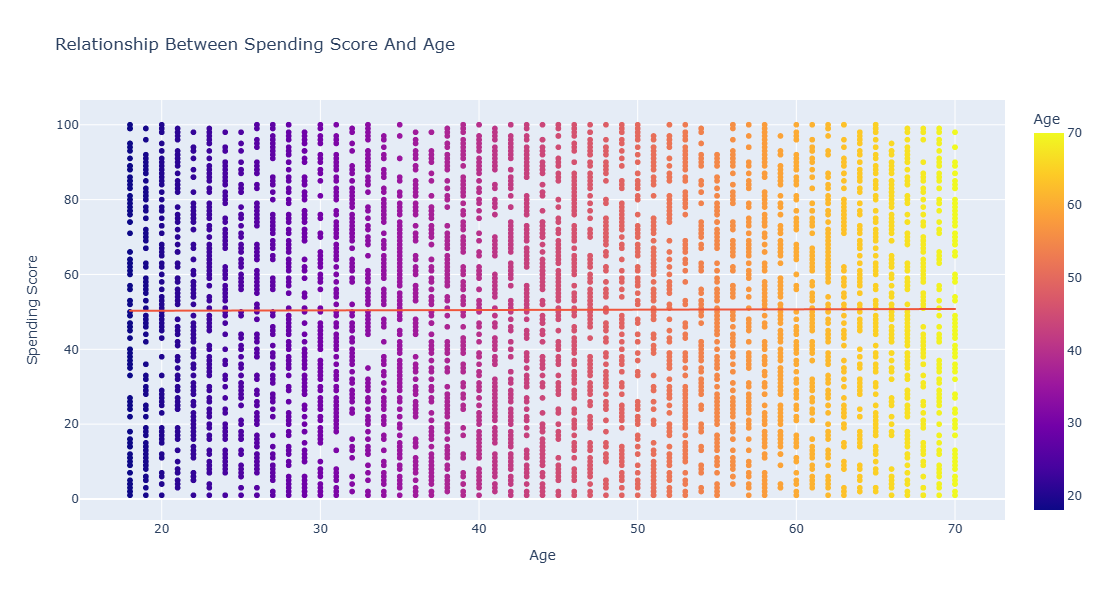

In [26]:
fig = px.scatter(df, x = 'Age' , y = 'Spending Score' , trendline = 'ols' , color = 'Age' , height = 600 , title = 'Relationship Between Spending Score And Age ')
fig.show()

***Insights :***

***NO CORRELATION BETWEEN THEM AS WE CAN SEE THE VALUE AND CHART AS WELL..........***

## Seasonal Trends:
*Which months see the highest volume of purchases?*

*Are there certain times of the year when customers spend more on specific product categories?*

*How does spending differ between weekdays and weekends?*

----------------------------------------------------------------------------------

### --- Which months see the highest volume of purchases?

In [27]:
## EXTRACTING MONTH TO CALCULATE VOLUME MONTHLY........
df['month'] = df['Purchase Date'].dt.month

In [94]:
volume = df.groupby('month')['Product Price ($)'].sum().reset_index().sort_values(by = 'Product Price ($)' , ascending = False)
volume

month  Product Price ($)
7       8          120396.78
8       9          112695.00
0       1          112689.71
3       4          112590.06
4       5          112247.66
2       3          108379.97
6       7          107721.08
1       2          106607.32
5       6          102467.21
9      10          100857.11
11     12           85427.80
10     11           84966.02

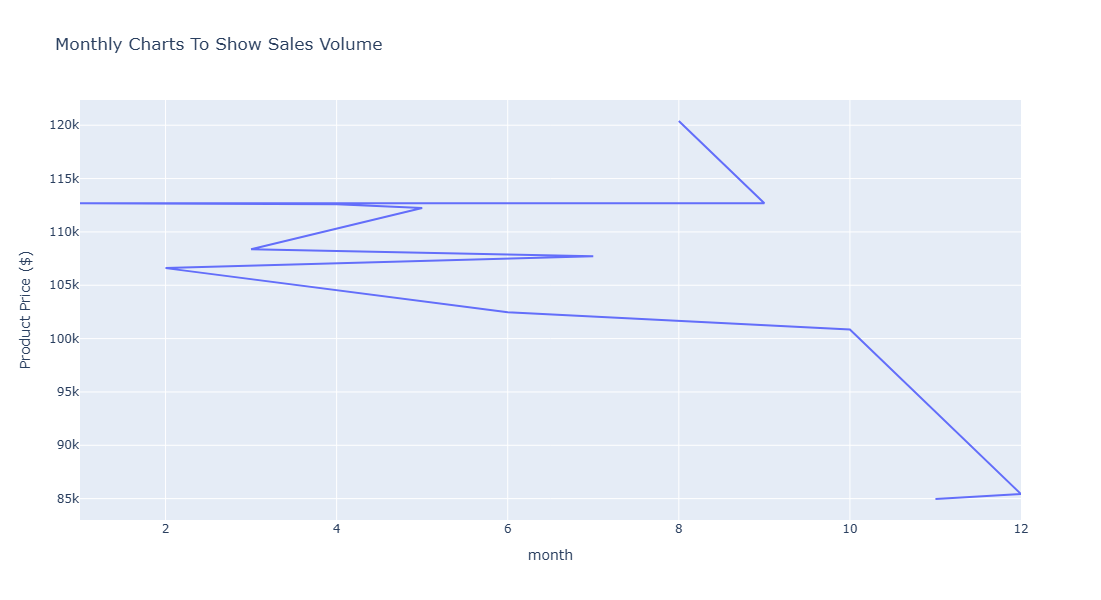

In [95]:
fig  = px.line(volume , x = 'month' , y = 'Product Price ($)' , title = 'Monthly Charts To Show Sales Volume' , height = 600)
fig.show()

***Insights :***

***Highest Volume Month Is 8***

-----------------------------------------------------------------------------------------

### --- Are there certain times of the year when customers spend more on specific product categories?

In [30]:
volume_by_product_cat = df.groupby(['month' , 'Product Category'])['Product Price ($)'].sum().reset_index().sort_values(by = 'Product Price ($)' , ascending = False)
volume_by_product_cat

month Product Category  Product Price ($)
51      8         Clothing           21930.31
49      8           Beauty           21190.78
34      5           Sports           20983.61
5       1   Home & Kitchen           20854.35
31      5      Electronics           20520.68
..    ...              ...                ...
73     11      Electronics           11081.93
52      8      Electronics           10374.38
75     11   Home & Kitchen           10357.81
71     11            Books            9943.90
25      4        Groceries            8958.16

[84 rows x 3 columns]

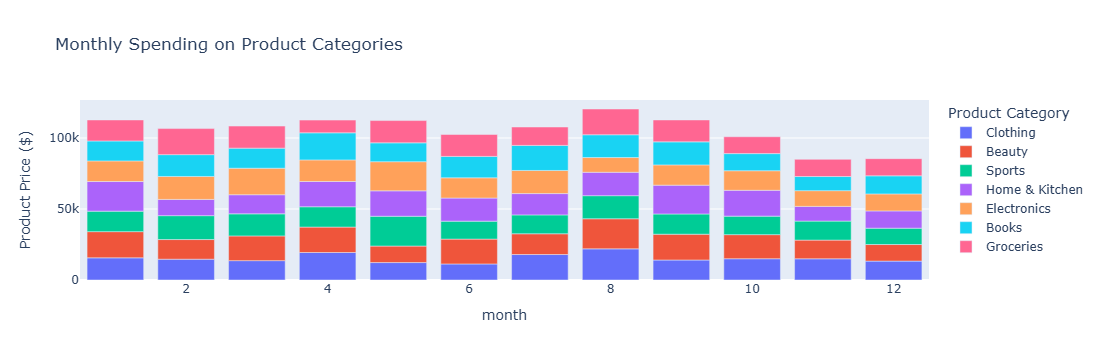

In [31]:
fig = px.bar(volume_by_product_cat , x = 'month', y = 'Product Price ($)' , color = 'Product Category' , title='Monthly Spending on Product Categories')
fig.show()

***-- Insights : From Above Graph***

1. Home & Kitchen
2. Groceries
3. Electronics
4. clothing
5. Sports
6. Beauty
7. Clothing
8. Clothing
9. Home & Kitchen
10. Home & Kitchen
11. clothing
12. clothing

*Top Categories Are :*

**1. Clothing** 

**2. Home & Kitchen**

In [32]:
df['season'] = df['Purchase Date'].dt.month % 12 // 3 + 1 ##  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
# Create a mapping for season labels
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_labels)

season_volume_by_product_cat = df.groupby(['season' , 'Product Category'])['Product Price ($)'].sum().reset_index().sort_values(by = 'Product Price ($)' , ascending = False)

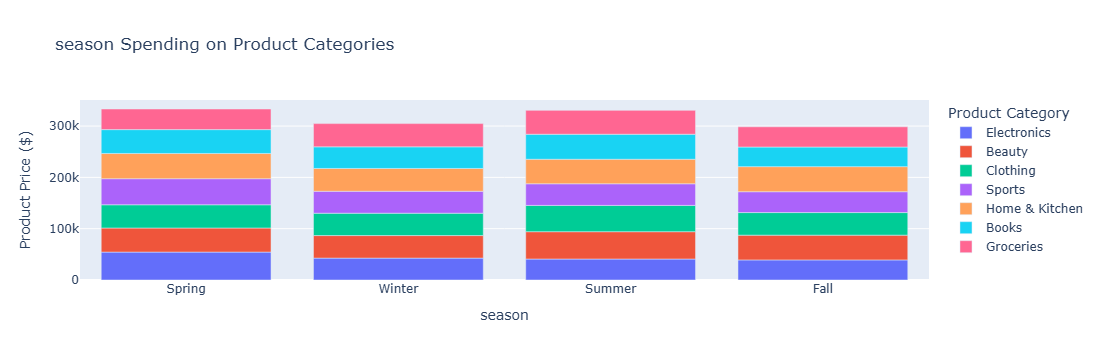

In [33]:
fig = px.bar(season_volume_by_product_cat , x = 'season', y = 'Product Price ($)' , color = 'Product Category' ,
             title='season Spending on Product Categories' )
fig.show()

***-- Insights : From Above Graph***

**Spring = Electronics**

**Winter = Groceries**

**Summer = Beauty**

**Fall = Home & Kitchen** 




--------------------------------------------------------------------------

### --- How does spending differ between weekdays and weekends?

In [34]:
df["day of week"] = df['Purchase Date'].dt.dayofweek # 0 = Monday, 6 = Sunday

# Map days to "Weekday" or "Weekend"
df['Day Type'] = df['day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [35]:
spending_by_days = df.groupby('Day Type')['Product Price ($)'].sum().reset_index()
spending_by_days

Day Type  Product Price ($)
0  Weekday          907232.79
1  Weekend          359812.93

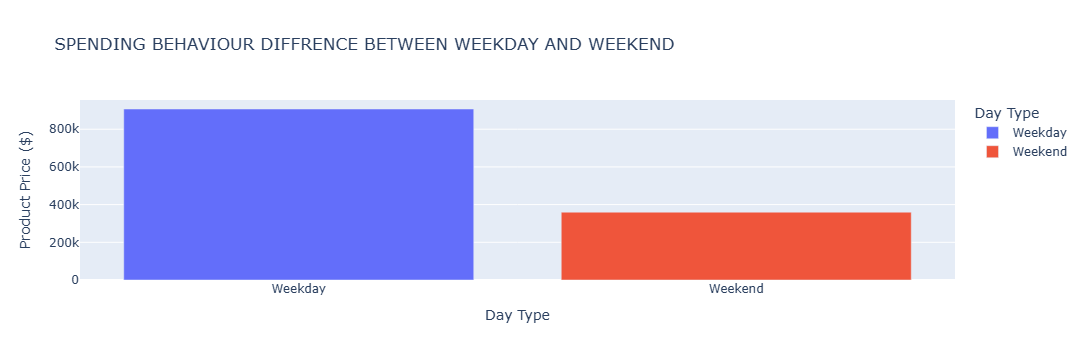

In [96]:
fig =  px.bar(spending_by_days , x = 'Day Type' , y = 'Product Price ($)' , color = 'Day Type'  , title = 'SPENDING BEHAVIOUR DIFFRENCE BETWEEN WEEKDAY AND WEEKEND')
fig.show()

## Payment Method Insights:

*What are the most popular payment methods among customers?*

*Do customers with higher spending scores prefer certain payment methods?*

*Are there any noticeable trends in payment method preferences by age group?*


--------------------------------------------------------

### --- What are the most popular payment methods among customers?

In [37]:
payment_count = df['Payment Method'].value_counts()
payment_count

Payment Method
Credit Card      1258
Debit Card       1256
Bank Transfer    1251
Paypal           1235
Name: count, dtype: int64

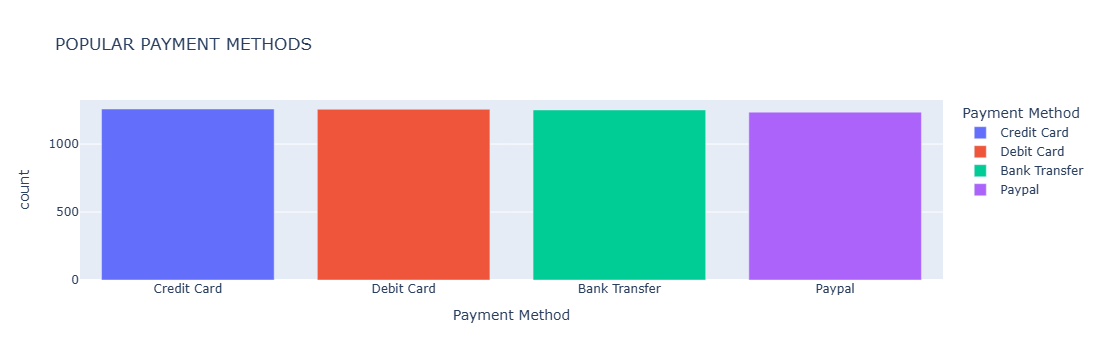

In [97]:
fig = px.bar(payment_count , x = payment_count.index , y = 'count' , color = payment_count.index , title = 'POPULAR PAYMENT METHODS')
fig.show()

---------------------------------------------------------------------

### --- Do customers with higher spending scores prefer certain payment methods?

In [39]:
# customers with higher spendings .................
high_spending_threshold = 75

high_spending_customer = df[df['Spending Score'] > high_spending_threshold]


In [40]:
high_spending_customer_payment =  high_spending_customer['Payment Method'].value_counts()

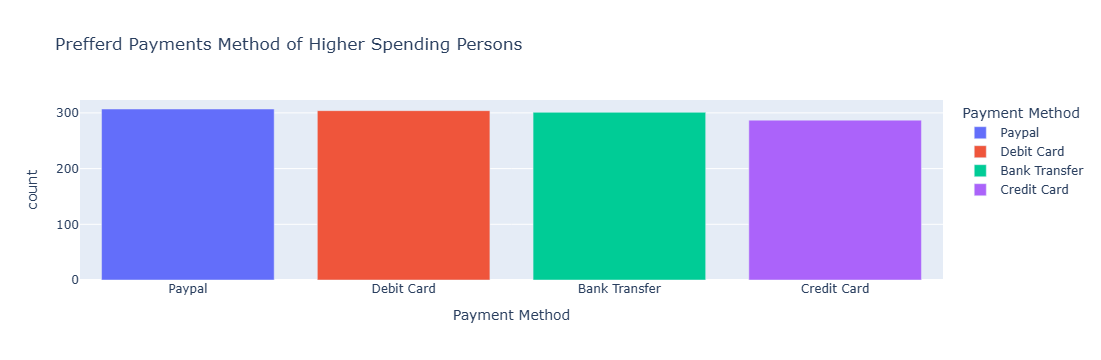

In [41]:
fig = px.bar(high_spending_customer_payment , x = high_spending_customer_payment.index , y = 'count' , color = high_spending_customer_payment.index , title = 'Prefferd Payments Method of Higher Spending Persons')
fig.show()

-------------------------------------------------------------

### --- Are there any noticeable trends in payment method preferences by age group?

In [42]:
pay_preff_by_age_groups = df.groupby('age_bracket')['Payment Method'].value_counts().reset_index()
pay_preff_by_age_groups.head()

age_bracket Payment Method  count
0         20s     Debit Card    281
1         20s         Paypal    278
2         20s  Bank Transfer    271
3         20s    Credit Card    263
4         30s  Bank Transfer    249

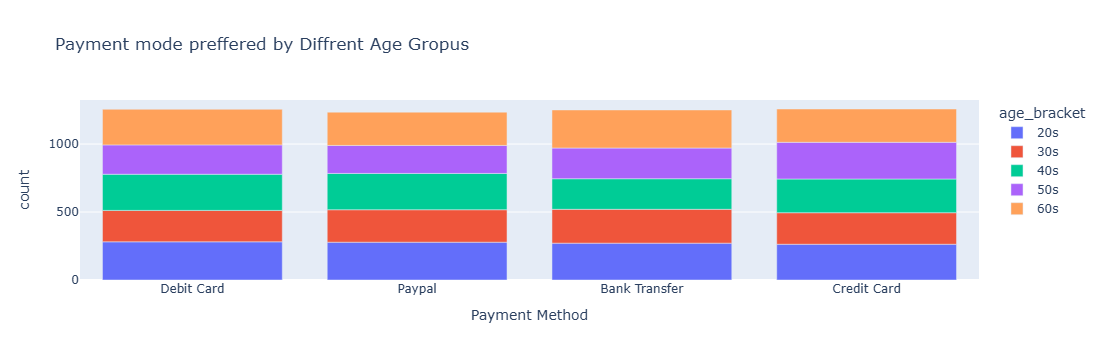

In [43]:
fig = px.bar(pay_preff_by_age_groups , x = 'Payment Method' , y = 'count' , color = 'age_bracket' , title = 'Payment mode preffered by Diffrent Age Gropus')
fig.show()

***---insights :***

**1. 20s : Debit card** 

**2. 30s : Bank Transfer** 

**3. 40s : PayPal** 

**4. 50s : credit card** 

**5. 60s : Bnak Transfer**

------------------------------------------------------------------------------

## Customer Loyalty:

*How many repeat customers are there in the dataset?*

*What is the average number of purchases per customer?*

*Is there a particular product category that repeat customers buy more frequently?*

------------------------------------

### --- How many repeat customers are there in the dataset?

In [53]:
frequent_cust = df.groupby('Customer ID')['Product Price ($)'].value_counts().reset_index().sort_values(by = 'Product Price ($)' , ascending  = False)
frequent_cust.head()

Customer ID  Product Price ($)  count
3151  9f628ad4-e540-4547-87f6-52937416445a             499.87      1
2552  801cb921-99b1-462c-bb0b-ee7bddfea258             499.74      1
3876  c531e52f-9ab6-4232-8dea-c552c78fc7b1             499.69      1
1606  50766cfb-09ba-4495-a195-b332f4645cd6             499.56      1
492   1a45788a-b7f6-41c6-88cf-32b41863e409             499.52      1

***--- Insights :***

**NO FREQUENT CUSTOMERS FOUND BUT WE HAVE FOUND THE MOST VALUEABLE CUSTOMERS ( WHO HAVE SPEND HIGH MONEY )**

-----------------------------------------------------------

### ---What is the average number of purchases per customer?

In [64]:
frequent_cust.iloc[: , 2].mean()

1.0

***Insights : On An Average "1"***

--------------------------------------------------------

### ---Is there a particular product category that repeat customers buy more frequently?

In [68]:
threshold = 400 # threshold to define the high paying customers........ 
high_pay = df[df['Product Price ($)'] > threshold ]

In [69]:
high_pay.shape ## 987 customers are high paying customers.........

(987, 15)

In [81]:
preffer = high_pay['Product Category'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
preffer

Product Category  count
0   Home & Kitchen    158
1            Books    152
2         Clothing    149
3           Beauty    147
4        Groceries    140
5           Sports    128
6      Electronics    113

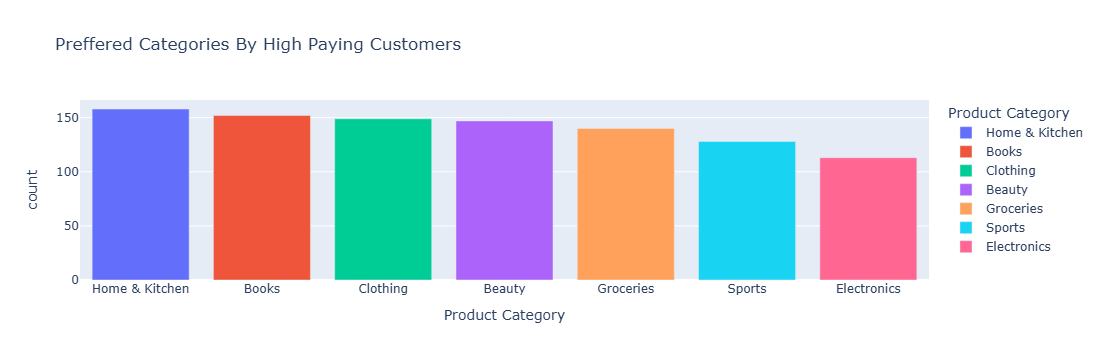

In [82]:
fig = px.bar(preffer , x= 'Product Category'  , y = 'count' ,  color = 'Product Category' , title = 'Preffered Categories By High Paying Customers' )
fig.show()

***Insights :***

***As we know we don't have frequent customers data but we have high paying customers data so these customers preffers mostly the 'Home & Kitchen' than 'Books' and so on............***


*****THANK YOU GUYS...*****